In [36]:
import numpy as np 
import pandas as pd 

In [37]:
df = pd.read_csv("spam.csv",encoding_errors= 'replace')

In [38]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [39]:
df.shape

(5572, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Data Preprocessing 

In [41]:
# Dropping irrelevant features
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [42]:
# Renaming columns into readable format
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [43]:
df.sample(5)

,Target,Text
2922,ham,Fine am simply sitting.
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1693,ham,Was gr8 to see that message. So when r u leavi...
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
4991,ham,I'm hungry buy smth home...


In [44]:
# Applying Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [45]:
# Checking for Null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [46]:
# Checking for duplicate values
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [47]:
df.shape

(5169, 2)

#### Exploratory Data Analysis and Feature Engineering 

In [48]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

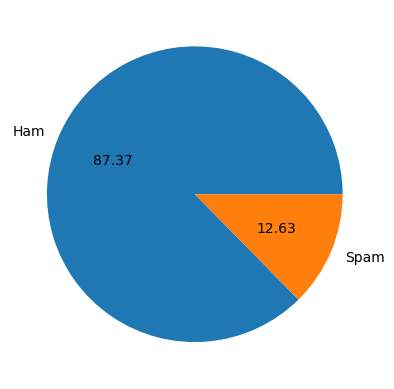

In [49]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

Observation : 
Data is Imbalanced (more biased towards Ham)

In [50]:
# importing Natural Language Tool Kit
!pip install nltk

In [51]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
# Extracting a new column with length of the SMS text
df['Num_Characters'] = df['Text'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_296\949619793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Characters'] = df['Text'].apply(len)


In [53]:
# Extracting a new column with total number of words
df['Num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_296\2318147305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [54]:
# Extracting a new column with total number of sentences
df['Num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_296\1536272688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [55]:
df.head()

,Target,Text,Num_Characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [56]:
# Description for overall data
df[['Num_Characters','Num_words','Num_sentences']].describe()

,Num_Characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [57]:
# Description for Spam SMS
df[df['Target'] == 1][['Num_Characters','Num_words','Num_sentences']].describe()

,Num_Characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [58]:
# Description for Ham SMS
df[df['Target'] == 0][['Num_Characters','Num_words','Num_sentences']].describe()

,Num_Characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


Observation : Average length of spams are higher than to that of ham SMS

In [59]:
import seaborn as sns

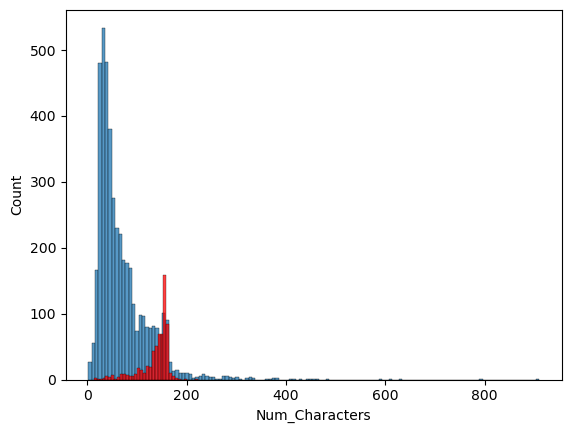

In [62]:
# Distribution of Spam and Ham characters
sns.histplot(df[df['Target'] == 0]['Num_Characters'])
sns.histplot(df[df['Target'] == 1]['Num_Characters'],color='red')
plt.show()

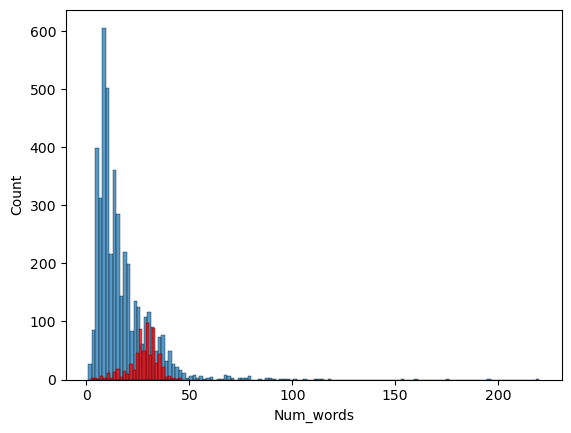

In [63]:
# Distribution of Spam and Ham words
sns.histplot(df[df['Target'] == 0]['Num_words'])
sns.histplot(df[df['Target'] == 1]['Num_words'],color='red')
plt.show()

Observation : There are outliers in both the cases 

In [64]:
# Understanding the relationship between features i.e. how number of words is related to 
# sentences and characters

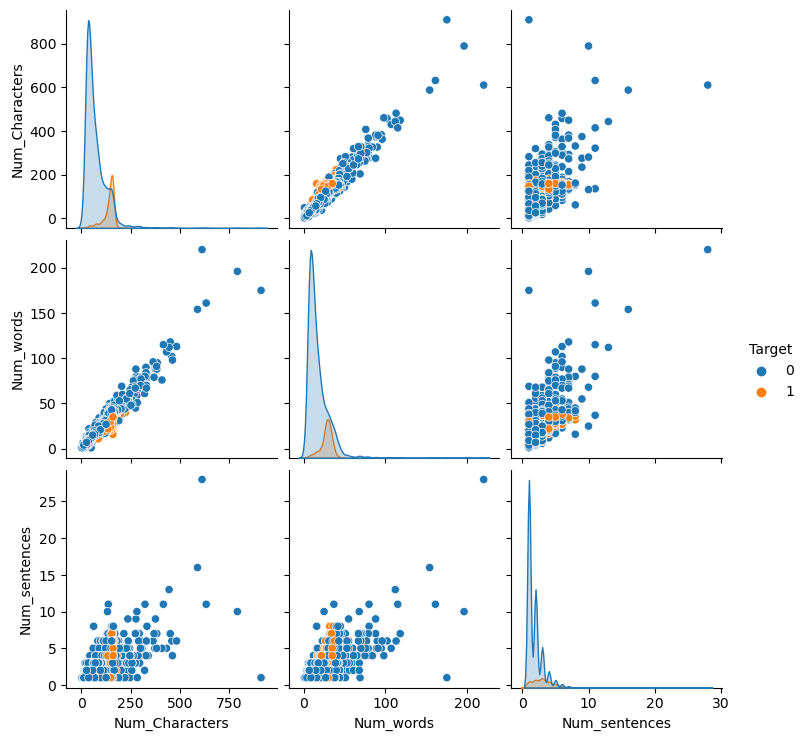

In [65]:
sns.pairplot(df,hue='Target')

Observation : Significant outliers

<AxesSubplot:>

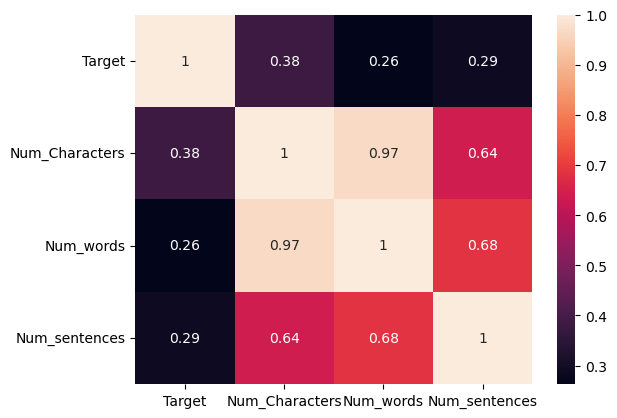

In [66]:
sns.heatmap(df.corr(),annot=True)

Observation : Num_characters has highest correlation with the Target variabe. <br>
    There is a tendency of multicollinearity in the data since we find independent <br>
    features being highly correlated among each other. Thus we will only take <br>
    one feature i.e. Num_Characters in data modelling.

#### Text preprocessing

Lower case <br>
Tokenization <br>
Removing special characters <br>
Removing stop words and punctuations <br>
Stemming 

In [69]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [72]:
def text_transformer(text):
    # Converting to lower case
    text = text.lower()
    
    # Performing Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuations 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Performing stemming
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [74]:
text_transformer('I love studying machine learning. I aim to become a Data Scientist')

'love studi machin learn aim becom data scientist'

In [75]:
df['Transformed_text'] = df['Text'].apply(text_transformer)

C:\Users\User\AppData\Local\Temp\ipykernel_296\2121854879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(text_transformer)


In [76]:
df.head()

,Target,Text,Num_Characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


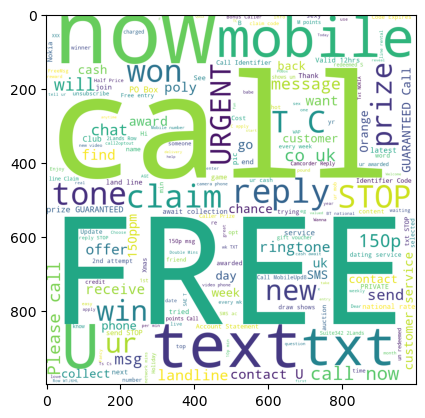

In [83]:
# Generating wordcloud 
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 1]['Text'].str.cat(sep = " "))
plt.imshow(spam_wc)

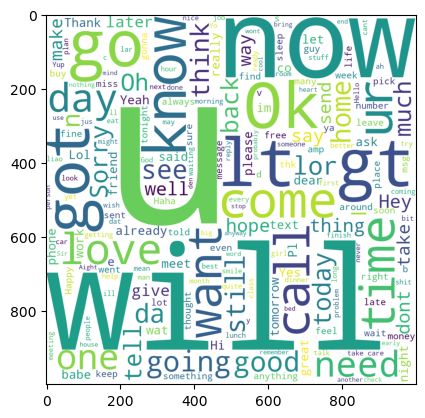

In [84]:
spam_wc = wc.generate(df[df['Target'] == 0]['Text'].str.cat(sep = " "))
plt.imshow(spam_wc)

In [98]:
# Finding top 30 most occuring words in Spam messages
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
len(spam_corpus)

9941

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


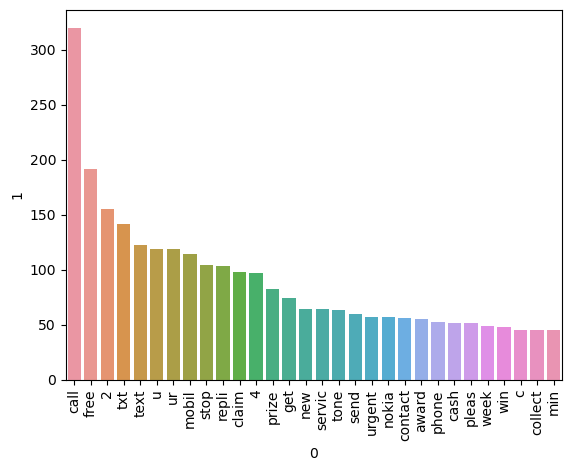

In [100]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [101]:
# Finding top 30 most occuring words in Ham messages
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


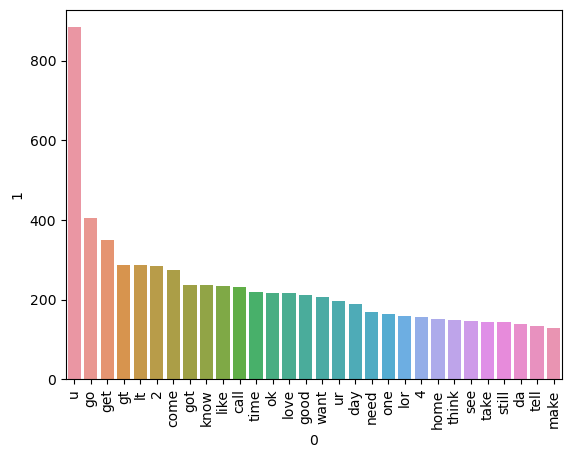

In [102]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

#### Model Building

In [133]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Using Count Vectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
x = cv.fit_transform(df['Transformed_text']).toarray()

In [117]:
print(x.shape)
y = df["Target"].values
y

(5169, 6677)


array([0, 0, 1, ..., 0, 0, 0])

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [120]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [126]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()         # We need to find a model with highest precision score since the data is imbalanced

In [129]:
# Gaussian Naive Bayes with cv
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [130]:
# Multinomial Naive Bayes with cv
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [131]:
# Bernoulli Naive Bayes with cv
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [174]:
# Using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [175]:
x = tfidf.fit_transform(df['Transformed_text']).toarray()
x.shape

(5169, 2500)

In [176]:
y = df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()         # We need to find a model with highest precision score since the data is imbalanced

In [179]:
# Gaussian Naive Bayes with tfidf
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8568665377176016
[[775 121]
 [ 27 111]]
0.47844827586206895


In [180]:
# Multinomial Naive Bayes with tfidf
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [181]:
# Bernoulli Naive Bayes with tfidf
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854932301740812
[[895   1]
 [ 14 124]]
0.992


Observation : TFIDF on Multinomial Niave Bayes have precesion = 1 i.e. 0 FP. We will proceede with this model.

In [183]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))